In [1]:
from sklearn.model_selection import ParameterGrid 
param_grid = {'a':[1,2],'b':[True,False]} 
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [2]:
param_grid = [{'kernel':['linear']},{'kernel':['rbf'],'gamma':[1,10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [ ]:
# 선형회귀 => 비선형회귀
- scikits 

In [4]:
from sklearn.preprocessing import PolynomialFeatures # 데이터를 다차원으로 변환
from sklearn.linear_model import LinearRegression # 선형회귀 => 비선형회귀

# train / validation / test 
# 전처리를 어느 시점에서 해야 하는가
# 전처리후 나누는가
# 나누고 전처리를 하는가 : 순서적으로 적용 ===> pipe_line
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2 , **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs)) # 비선형회귀를 위해 다차원으로 보내고 비선형회귀 하도록 pipeline 으로 묶음

In [8]:
import numpy as np
def make_data(N , err = 1.0 , rseed = 1): # 학습을 위한 데이터
    rng = np.random.RandomState(rseed) # 의사난수의 시작점을 지정 ( 실제 난수처럼 보이도록 함 )
    X = rng.rand(N,1) ** 2
    y = 10 - 1/ (X.ravel() + 0.1) # ravel() : 데이터를 1차원으로 배열
    if err > 0:
        y += err * rng.randn(N)
    return X,y
X,y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


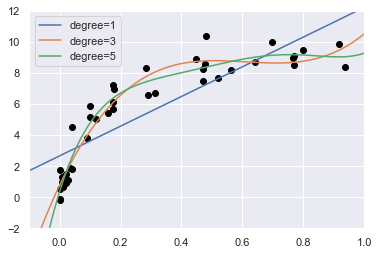

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
X_test = np.linspace(-0.1,1.1,500)[:,None] # -0.1 ~ 1.1 까지 지정하고 500개로 나눔 

plt.scatter(X.ravel(),y,color='black') # 점 출력
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test) # 학습데이터로 바로 예측
    plt.plot(X_test.ravel(),y_test,label = 'degree={}'.format(degree))
plt.xlim(-0.1,1)
plt.ylim(-2,12)
plt.legend(loc='best')

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree':np.arange(21),
               'linearregression__fit_intercept' : [True,False],
               'linearregression__normalize':[True,False] }
grid = GridSearchCV(PolynomialRegression() , param_grid , cv = 7)
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [12]:
grid.best_params_ # 최적의 parameter 를 알려줌

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [13]:
grid.get_params() # parameter를 보여줌

{'cv': 7,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'estimator__verbose': False,
 'estimator__polynomialfeatures': PolynomialFeatures(),
 'estimator__linearregression': LinearRegression(),
 'estimator__polynomialfeatures__degree': 2,
 'estimator__polynomialfeatures__include_bias': True,
 'estimator__polynomialfeatures__interaction_only': False,
 'estimator__polynomialfeatures__order': 'C',
 'estimator__linearregression__copy_X': True,
 'estimator__linearregression__fit_intercept': True,
 'estimator__linearregression__n_jobs': None,
 'estimator__linearregression__normalize': False,
 'estimator__linearregression__positive': False,
 'estimator': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'n_jobs': None,
 'param_grid': {'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,

In [14]:
grid.cv_results_['params'] # degree 차수에 따라 진행된 결과를 보여줌

[{'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 0},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 1},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 2},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 3},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 4},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 5},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 6},
 {'linearregression__fit_intercept': True,
  'linearregression__normalize': True,
  'polynomialfeatures__degree': 7},
 {'linearregression__fit_intercept': True,
  'linearregr

In [15]:
grid.best_estimator_ # 최고의 조합일때

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression',
                 LinearRegression(fit_intercept=False, normalize=True))])

In [16]:
grid.best_score_ # 최고의 조합일때의 정확도

0.8972710305736543

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

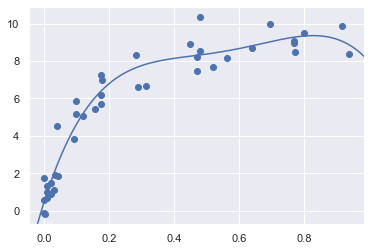

In [17]:
model = grid.best_estimator_ # 최적의 모델

plt.scatter(X.ravel(),y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [18]:
# pip install graphviz  ==> 3d 시각화

Note: you may need to restart the kernel to use updated packages.


In [19]:
# pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
# pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=3490d7ca654a3c8f86643719430418977c249af5bd330bf2c8cab3a5b0e355e7
  Stored in directory: c:\users\202-12\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

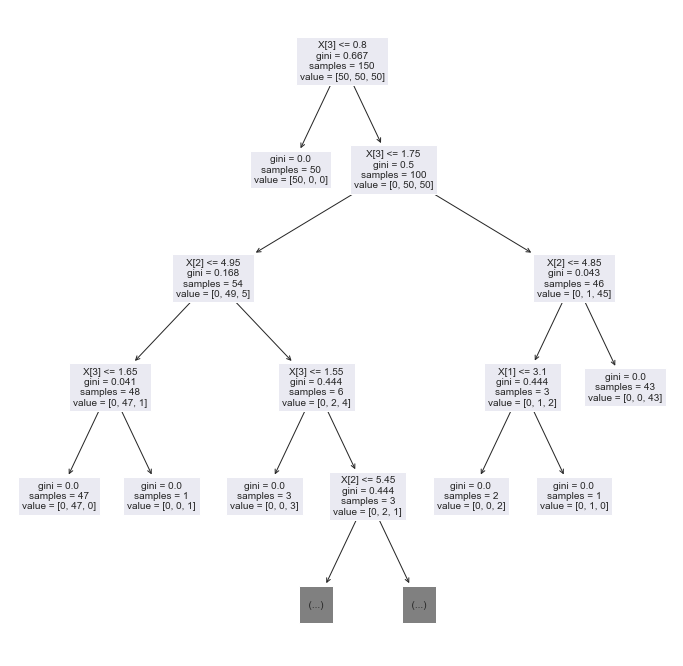

In [22]:
fig ,ax = plt.subplots(figsize=(12,12))
clf = clf.fit(iris.data,iris.target)
tree.plot_tree(clf,max_depth=4,fontsize=10)

In [26]:
cross_val_score(clf,iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [27]:
import pandas as pd
data = pd.DataFrame(iris.data)
print(data.head())
clf.predict(data.iloc[1:150,:])

# 대학 등급 나누기 좋을듯 

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])